In [1]:
import ROOT #Start by importing ROOT
import numpy as np
# ROOT.enableJSVis() #need this to make interactive ROOT plots
import os
import time
c1 = ROOT.TCanvas() #declare the ROOT canvas
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")
# ROOT.gSystem.Load("/usr/local/software/quadis/build/lib/libquadis.so")   

Welcome to JupyROOT 6.22/02


0

0.02277747413332971
Loaded library tree with 1724 entries
Best fit index: 692 with chi-square: 1.04093 NDOF: 103 shifted: 938 start data sample: 1969 and prob: 1


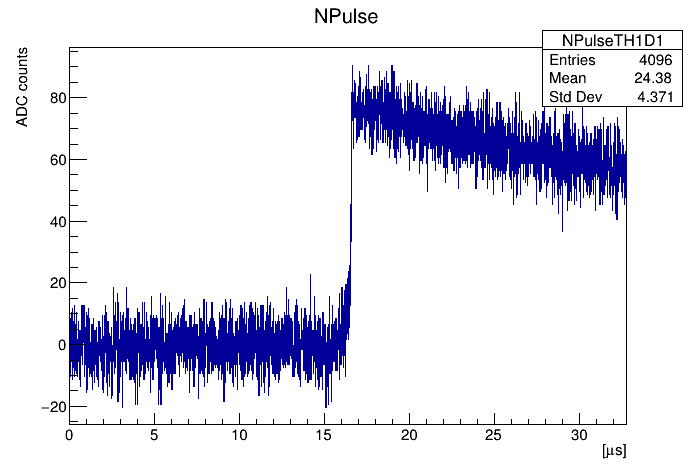

In [2]:
#Grab a pulse from the data
infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/zscan_1000/data1.root")
# infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/CleanNoisyPulses/parallel_output/60kev/data10_sim405to449.root")
# infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/June_2018/RUN10000000_0.root")
tree = infile.Get("T1")
nevent = ROOT.NEvent()
tree.SetBranchAddress("NEvent",nevent)
tree.GetEntry(698)
npulse = nevent.GetPulse(0) #the original pulse

#Initialize the fitter
fitter = ROOT.NAPulseFitter("/home/vasu/PPC/PPC_SigGen/SignalLib_root/new_OutputRZperfect.root","T1","NEvent",1)

# Parameters to pre-process pulse
baselines = 1000
taus = 7100
rises=700
gaps=225
pulse = fitter.GetPreProcessedPulse(npulse, False, baselines, taus, rises, gaps)# true applies pole-zero
ph = npulse.GetTH1Dmus()
ph.Draw()
c1.Draw()
raPulse = ROOT.NPulse()
raFilter = ROOT.NFRunningAverage(80)
raFilter.Filter(pulse,raPulse)
blrPulse = ROOT.NPulse()
blrFilter = ROOT.NFBaselineRemover(1000)
blrFilter.Filter(raPulse,blrPulse)
baselineRMS = blrFilter.GetCalcParameterByName("BaselineRMS")
print (baselineRMS)
#Prepare the fitter
fitter.SetLibPulseMinThreshold(0.01)
fitter.SetLibPulseMaxThreshold(0.75)
# fitter.FixNDOF() #if true, maxthreshold ignored
# fitter.SetNDOF(100)
fitter.SetShiftWindow(5) #shift by +/- this much around point of alignment
#Do the fit:
fitter.FitPulse(raPulse)
#Print the best fit
fitter.PrintBestFit()
#fitter.PrintFitResult(1466)
ind = fitter.GetBestIndex()

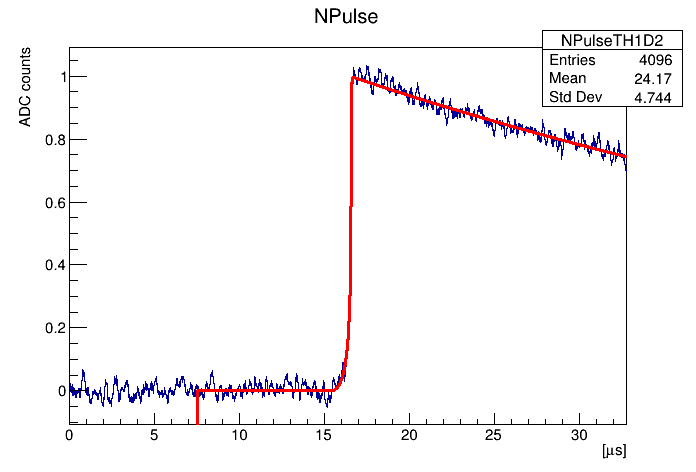

In [3]:
libpulse = fitter.GetBestFitPulse()
shift = fitter.GetBestShift()
ph = raPulse.GetTH1Dmus()
ph.Draw()

lh = libpulse.GetTH1Dmus()
lh.SetLineColor(2)
lh.SetLineWidth(3)
lh.GetXaxis().SetLimits(8*shift/1000.,8*shift/1000.+lh.GetNbinsX()*8/1000.)
lh.Draw("same")
c1.Draw()